In [97]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import math
import os
import yaml
import itertools

In [98]:
# new baseline
detection_boxes_new_comm = [0, 7.9686, 9.3284, 10.3390, 11.3430, 12.6657, 13.6646, 14.2483, 14.6629]
detection_boxes_new = [
    [0.7137, 0.7216, 0.7338, 0.7476, 0.7626, 0.7851, 0.7969, 0.8027, 0.8070],
    [0.6728, 0.6784, 0.6867, 0.6990, 0.7136, 0.7324, 0.7439, 0.7501, 0.7528],
    [0.5742, 0.5758, 0.5785, 0.5829, 0.5906, 0.6059, 0.6086, 0.6123, 0.6144],
]

In [99]:
pose_error_early=[0,0.2,0.4,0.6]
result_early=[
    [0.8266377134943309,0.8268667436847666,0.8267666163992828,0.8271169159115742],
    [0.761487887115814,0.7617298010954958,0.7614370991413719,0.7614434214174434],
    [0.614971610267077,0.6151234042102812,0.6146069733740659,0.6150476633882647]
]

In [100]:
pose_error_late=[0,0.2,0.4,0.6]
result_late=[
    [0.8327451374723763,0.8138363740599042,0.7751063922558838,0.757914523332483],
    [0.7056855065546341,0.6824536895944117,0.6503196661791363,0.6410028094353798],
    [0.5203301566597827,0.5033783548165957,0.4927952165779715,0.5046700579834124]
]

In [101]:
pose_error_no=[0,0.2,0.4,0.6]
result_no=[
    [0.7395032365805312,0.7353296808447682,0.7237284742475324,0.7034235192726179],
    [0.6880384067701688,0.6858197549887246,0.676231841597101,0.658593597779375],
    [0.5685732394190713,0.5669991970011873,0.5600264376942878,0.5464955034330459]
]

In [102]:
pose_error_early04=[0,0.2,0.4,0.6]
result_early04=[
    [0.8334265253829396,0.8335131790152387,0.83355120227769,0.8332919503256119],
    [0.7711782911291784,0.770797990312487,0.7710219663364186,0.7706013779129316],
    [0.6132239245704445,0.6129060399079157,0.6132207864075435,0.6128366278405865]
]

In [103]:
pose_error_late04=[0,0.2,0.4,0.6]
result_late04=[
    [0.8293859795435623,0.8139358703523534,0.7788985976617643,0.7495452123423452],
    [0.6999907869636153,0.6795387067057581,0.643047154908565,0.6338272336610031],
    [0.5105841699041674,0.49410280639317133,0.4862004056588915,0.49545137083182206]
]

In [104]:
pose_error_no04=[0,0.2,0.4,0.6]
result_no04=[
    [0.7364986366001193,0.7320944127039417,0.7217173611947331,0.700020880218611],
    [0.6855452355217888,0.6835550264422495,0.6741500389814749,0.6553607402368494],
    [0.5673034921133598,0.5662723000135105,0.5591365603287166,0.5446848435406418]
]

In [105]:
savepath=r"c:\Users\Yunqiao Yang\Desktop\Co-perception\pose error\0.20.4train绝对.png"

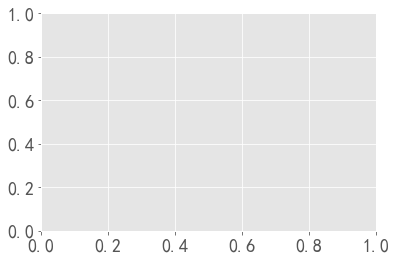

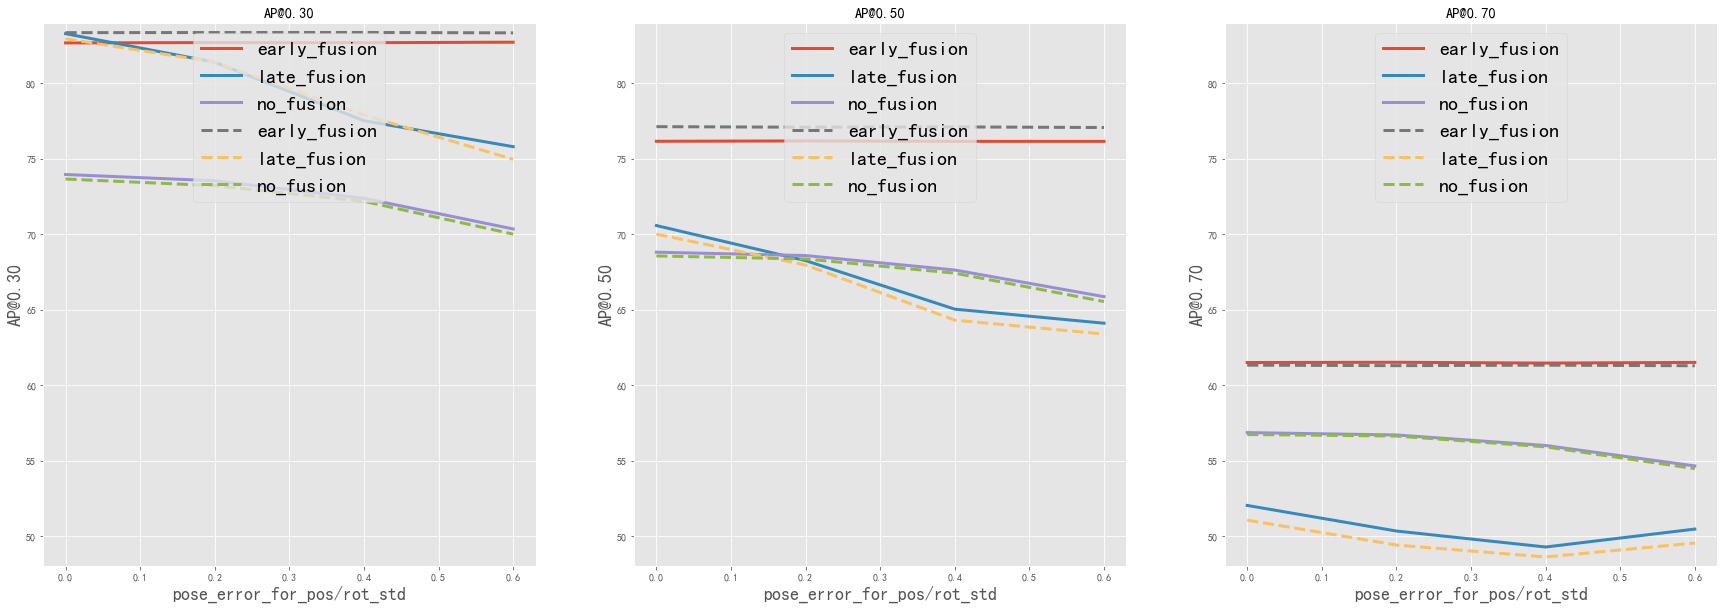

In [106]:
Late_cost = [0,14]
label_size = 18
metrics = ['AP@0.30', 'AP@0.50', 'AP@0.70']
plt.tick_params(labelsize=label_size)
fig = plt.figure(figsize=(30, 10))
for i, metric in enumerate(metrics[:3]):
    plt.subplot(1, 3, 1 + i)
    # plt.plot(detection_boxes_new_comm, [x * 100 for x in detection_boxes_new[i]],
    #         label='Points in Detection boxes(Baseline_new)', linewidth=3)
    plt.ylim(48, 84)
    plt.plot(pose_error_early, [x * 100 for x in result_early[i]], label='early_fusion', linewidth=3)
    plt.plot(pose_error_late, [x * 100 for x in result_late[i]], label='late_fusion', linewidth=3)
    plt.plot(pose_error_no, [x * 100 for x in result_no[i]], label='no_fusion', linewidth=3)
    plt.plot(pose_error_early04, [x * 100 for x in result_early04[i]],'--', label='early_fusion', linewidth=3)
    plt.plot(pose_error_late04, [x * 100 for x in result_late04[i]],'--', label='late_fusion', linewidth=3)
    plt.plot(pose_error_no04, [x * 100 for x in result_no04[i]], '--',label='no_fusion', linewidth=3)
    plt.ylabel(metric, size=label_size)
    plt.xlabel('pose_error_for_pos/rot_std',size=label_size)
    plt.title(metric)
    plt.legend(loc='upper center',prop={'size': 20})
plt.savefig(savepath)